In [1]:
# Install YOLOv8 (Ultralytics) and other dependencies if not already installed
%pip install ultralytics opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\codes\object-detection-yolov8-demo\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 📦 Step 1: Install Dependencies
We're using:
- **Ultralytics** for YOLOv8
- **OpenCV** for image handling
- **Matplotlib** for displaying images

The `%pip` command is Jupyter-friendly for installing packages.

In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Optional: Display multiple outputs in notebook cells
from IPython.display import display, Image

# Set image paths
INPUT_DIR = Path("../images/input")
OUTPUT_DIR = Path("../images/output")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

## 🧪 Step 2: Import Libraries and Set Paths
We define input and output directories using `Pathlib` for clean path management.
If output folder doesn't exist, it will be created automatically.

In [3]:
# Load the YOLOv8 model (use yolov8n.pt or yolov8s.pt for lightweight demo)
model = YOLO("yolov8n.pt")  # or "yolov8s.pt"

## 🤖 Step 3: Load Pre-trained YOLOv8 Model
We’re using `yolov8n.pt` (nano version) — fast and lightweight. 
You can swap it with `yolov8s.pt` or other versions later.

c:\codes\object-detection-yolov8-demo\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


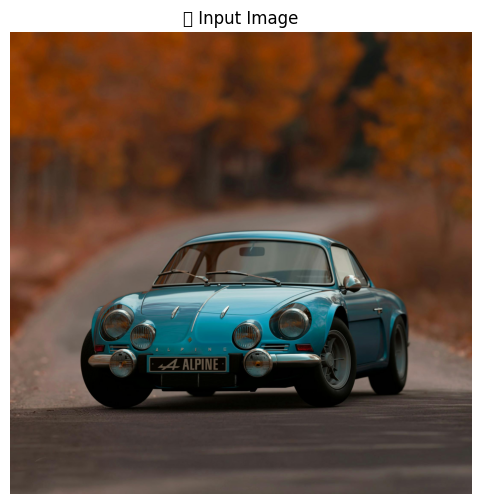

In [4]:
# Choose an image from input folder
image_path = next(INPUT_DIR.glob("*.*"))  # Automatically picks first image
img = cv2.imread(str(image_path))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show input image
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("📸 Input Image")
plt.axis("off")
plt.show()

## 🖼️ Step 4: Load and Display Input Image
We automatically grab the first image in the `input/` folder.
OpenCV loads in BGR format — we convert it to RGB for proper display with `matplotlib`.

In [5]:
# Run inference
results = model(img)

# Visualize and save result
annotated_img = results[0].plot()  # Draw boxes on a copy of the image

# Save output
output_path = OUTPUT_DIR / f"{image_path.stem}_output.jpg"
cv2.imwrite(str(output_path), annotated_img)


0: 640x640 1 car, 297.9ms
Speed: 14.0ms preprocess, 297.9ms inference, 13.9ms postprocess per image at shape (1, 3, 640, 640)


True

## 🎯 Step 5: Run Object Detection and Save Output
We use the YOLO model to detect objects in the image.
- `results[0].plot()` returns a version of the image with bounding boxes.
- Output is saved in the `output/` folder.

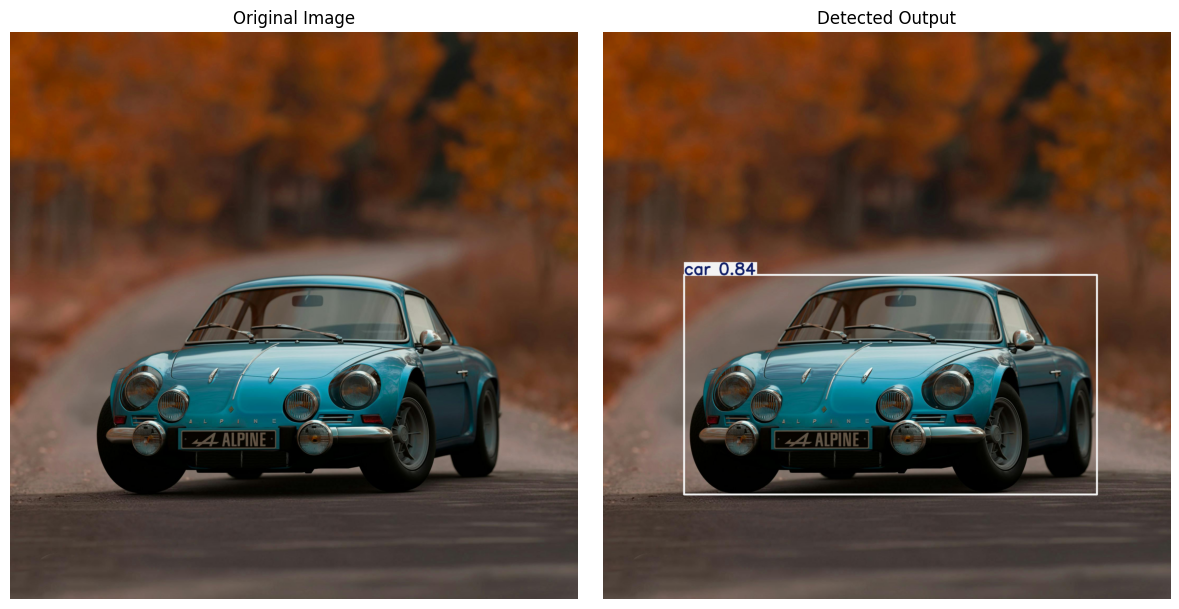

In [6]:
# Convert output image to RGB for display
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(annotated_img_rgb)
axs[1].set_title("Detected Output")
axs[1].axis("off")

plt.tight_layout()
plt.show()

## 🧪 Step 6: Visualize Input vs Output Side-by-Side
We use `matplotlib` to compare the raw input and detected output images in a single view.